# 2. Labos uživo -Numerička matematika

Ime i prezime: *Filip Ćelepirović*

1 . Zadani su podaci 
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.15&2.3 &3.15 & 4.85 & 6.25 & 7.95\\ \hline
y_i &4.79867& 4.49013 & 4.2243 & 3.47313 & 2.66674 & 1.51909\end{array}$$
koji predstavljaju vrijednost funkcije $f(x)=4.8 \cos \frac{\pi x}{20}$.  Odredite Lagrangeov interpolacijski polinom koristeći funkciju [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html), te grafički prikažite polinom i funkciju f(x), na istom grafu. (za pomoc mozete pogledati i prvu Jupyter bilježnicu vezanu za interpolaciju u predavanjima [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb) - ako ne radi ovaj link onda [link2](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb))

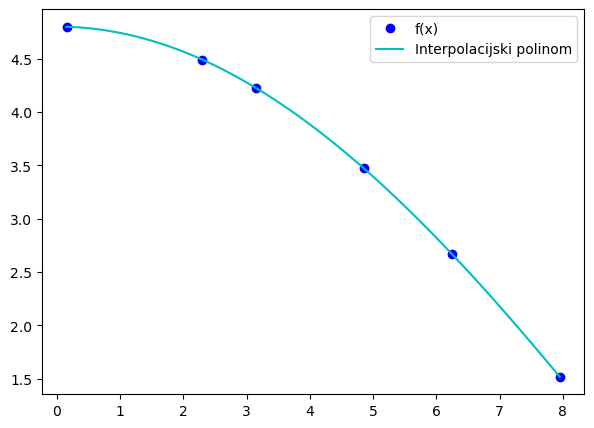

In [2]:
import numpy as np
import matplotlib.pyplot as plt
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])



from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

P=lagrange(xData, yData)
xp = np.linspace(0.15, 7.95, 100)
fig= plt.subplots(figsize=(7,5))
plt.plot(xData, yData, 'bo', label="f(x)")
plt.plot(xp, P(xp), 'c-', label="Interpolacijski polinom")
plt.legend()
plt.show()


  2 . Za podatke
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.1&0.2 &0.3 & 0.4 & 0.5 & 0.6& 0.7 & 0.8 & 0.9 & 1.0\\ \hline
y_i &1& 5 & 2 & 7 & 1 & 2 & 2 & 7 & 9 & 2\end{array}$$
formiraj Vandermondeovu matricu te izračunaj koeficijente interpolacijskog polinoma, kao što je to napravljeno u početnoj Jupyter bilježnici s predavanja (1. bilježnica vezana za interpolaciju [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)- ako ne radi ovaj link onda [link2](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)). Nakon toga nacrtajte dobiveni polinom, ali to tako da ga izvrijednite u vektoru koji ima oko 100 točaka iz intervala $[0.1, 1.0]$ npr. f=np.polyval(c,xu) i plt.plot(xu,f, label=r'$p(x)$') gdje xu ima stotinjak točaka iz navedenog intervala.

Condition number= 56019784.61349066


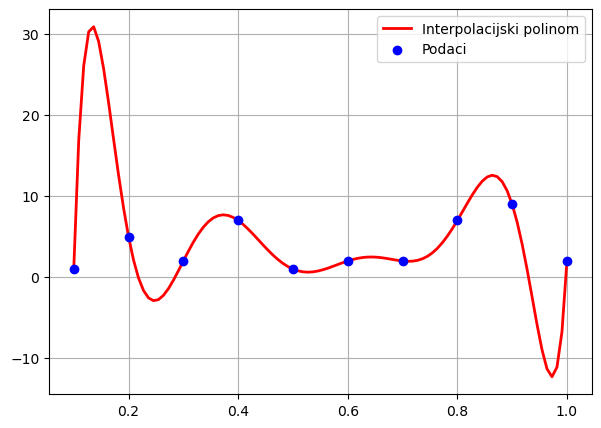

In [3]:
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1,5,2,7,1,2, 2,7, 9, 2])



V = np.vander(x, increasing=True)
print("Condition number=", np.linalg.cond(V))

coefficients = np.linalg.solve(V, y)

x_eval = np.linspace(0.1, 1.0, 100)
y_eval = np.polyval(coefficients[::-1], x_eval)  

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_eval, label="Interpolacijski polinom", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.legend()
plt.grid()
plt.show()


3. a)Za podatke iz 2. zadatka upotrijebite funkciju polyfit [link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), te aproksimirajte podatke, polinomom stupnja 1,2, 3, 9. Ovo je aproksimacija u smislu najmanjih kvadrata! Dobivamo li za $n=9$ intepolacijski polinom? (vidi predavanja. skripta: Metoda najmanjih kvadrata i Jupyter bilježnicu [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/mnk.ipynb)- ako ne radi ovaj link onda [link](https://github.com/anazga/Nummat-21_22/blob/main/mnk.ipynb))

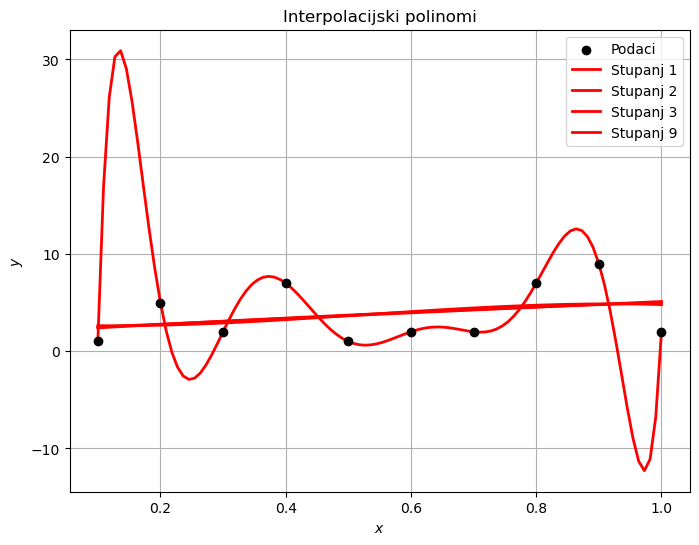

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', np.RankWarning)

x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1, 5, 2, 7, 1, 2, 2, 7, 9, 2])

degree_1 = np.polyfit(x, y, 1)  
degree_2 = np.polyfit(x, y, 2)
degree_3 = np.polyfit(x, y, 3)
degree_9 = np.polyfit(x, y, 9)  

x_eval = np.linspace(0.1, 1.0, 100)
y_degree_1 = np.polyval(degree_1, x_eval)
y_degree_2 = np.polyval(degree_2, x_eval)
y_degree_3 = np.polyval(degree_3, x_eval)
y_degree_9 = np.polyval(degree_9, x_eval)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Podaci", color="black", zorder=5, marker='o')
plt.plot(x_eval, y_degree_1, label="Stupanj 1", color="red", linestyle="solid", linewidth=2)
plt.plot(x_eval, y_degree_2, label="Stupanj 2", color="red", linestyle="solid", linewidth=2)
plt.plot(x_eval, y_degree_3, label="Stupanj 3", color="red", linestyle="solid", linewidth=2)
plt.plot(x_eval, y_degree_9, label="Stupanj 9", color="red", linestyle="solid", linewidth=2)

plt.legend()
plt.grid()
plt.title("Interpolacijski polinomi")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()


b) Za iste podatke formiraj kubni splajn kao što je to napravljeno u Jupyter bilježnici s predavanja [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Splajnovi.ipynb) (za slučaj da ovaj link ne radi koristite [link2](https://github.com/anazga/Nummat-21_22/blob/main/Splajnovi.ipynb)) pomoću paketa *interpolate* te nacrtaj splajn za navedene podatke. U Markdown ćeliji napišite koja je interpolacija bolja (splajn ili polinom) i zašto.

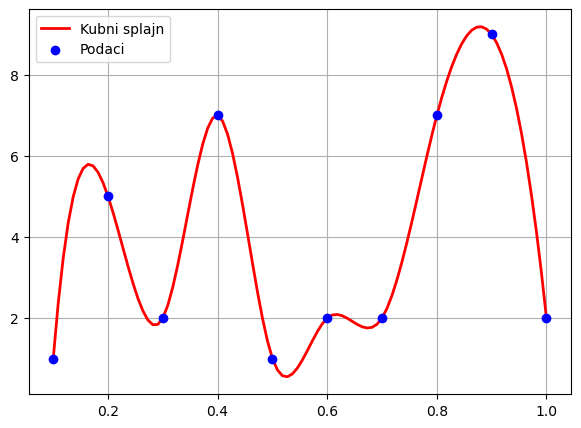

In [15]:
from scipy.interpolate import interp1d


cubic_spline_interp1d = interp1d(x, y, kind='cubic')
y_spline_interp1d = cubic_spline_interp1d(x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_spline_interp1d, label="Kubni splajn", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.legend()
plt.grid()
plt.show()



Interpolacija splajnovima je bolja jer pruža stabilnije rezultate, 
bez oscilacija i numeričkih problema koje visoki stupnjevi polinoma mogu uzrokovati.


4 .  Prema dostupnim informacijama na raspolaganju su nam sljedeći podaci o broju stanovnika u Hrvatskoj
$$\begin{array}{|c|c|} t_i& p_i \\ \hline \hline \\
1964. & 4259680\\
1969. & 4387000\\
1974. & 4497000\\
1979. & 4571000\\
1984. & 4680000\\
1989. & 4767000\\
1994. & 4650000\\
1999. & 4554000\\
2004. & 4439000\\
2009. & 4432001
\end{array}$$ 

Također poznata je informacija da je 2011. godine bilo $4456096$ stanovnika. Zadane podatke interpolirajte potom koristeći kubni splajn [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) kao što je to napravljeno u Jupyter bilježnici s predavanja [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)- za slučaj da ovaj link ne radi koristiti [link3](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb). Nacrtajte graf toga splajna. Nakon toga procijenite broj stanovnika u 2011. Izračunajte apsolutnu pogrešku. 

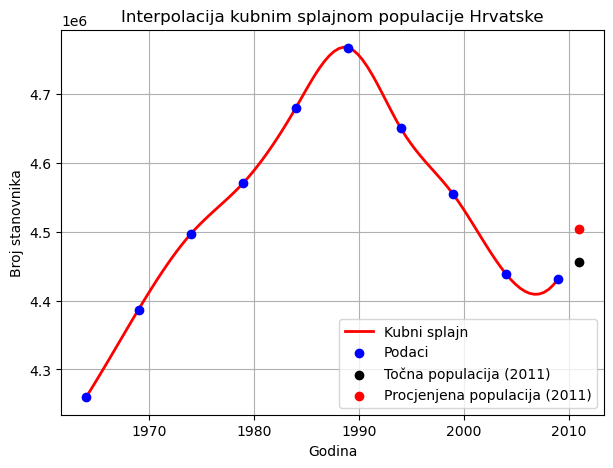

Procjena broja stanovnika 2011. godine:  4504027.068685674
Apsolutna pogreška:  47931.06868567411


In [16]:
x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])



from scipy.interpolate import CubicSpline


actual_population_2011 = 4456096 

cubic_spline_population = CubicSpline(x, y)

estimated_population_2011 = cubic_spline_population(2011.0)

absolute_error = abs(estimated_population_2011 - actual_population_2011)


x_eval = np.linspace(1964.0, 2009.0, 100)
y_spline = cubic_spline_population(x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_spline, label="Kubni splajn", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.scatter([2011], [actual_population_2011], label="Točna populacija (2011)", color="black", zorder=6)
plt.scatter([2011], [estimated_population_2011], label="Procjenjena populacija (2011)", color="red", zorder=6)
plt.title("Interpolacija kubnim splajnom populacije Hrvatske")
plt.xlabel("Godina")
plt.ylabel("Broj stanovnika")
plt.legend()
plt.grid()
plt.show()

print("Procjena broja stanovnika 2011. godine: ", estimated_population_2011)
print("Apsolutna pogreška: ", absolute_error)

5 .   Zadane podatke iz 4. zadatka  interpolirajte najprije koristeći polinomijalnu interpolaciju tako da iskoristite funkcije *lagrange* i *polyfit* koje ste koristili u 1. i 3. zadatku. Prikažite rezultate na zasebnim grafovima. Prolaze li interpolacijski polinomi u ovom slučaju interpolacijskim točkama?

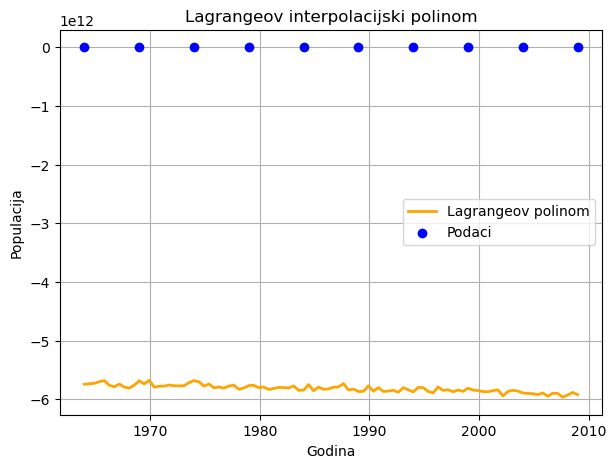

False


In [18]:
lagrange_poly_population = lagrange(x, y)
y_lagrange_population = lagrange_poly_population(x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_lagrange_population, label="Lagrangeov polinom", color="orange", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.title("Lagrangeov interpolacijski polinom")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.legend()
plt.grid()
plt.show()
                            
lagrange_pass = np.allclose(lagrange_poly_population(x), y)
print(lagrange_pass)

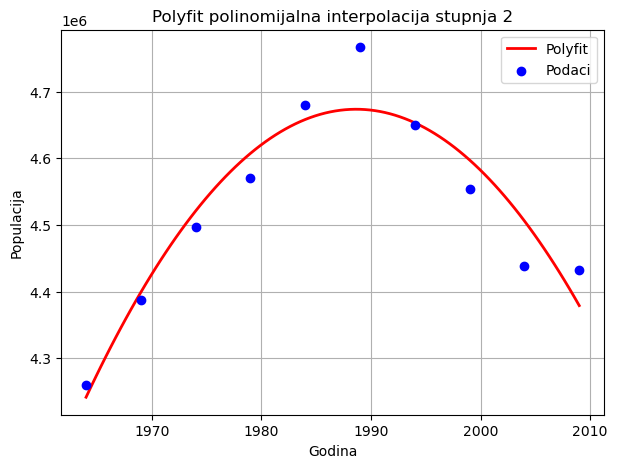

False


In [19]:
degree_2_poly = np.polyfit(x, y, 2)
y_polyfit_population = np.polyval(degree_2_poly, x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_polyfit_population, label="Polyfit", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.title("Polyfit polinomijalna interpolacija stupnja 2")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.legend()
plt.grid()
plt.show()

polyfit2_pass = np.allclose(np.polyval(degree_2_poly, x), y)
print(polyfit2_pass)

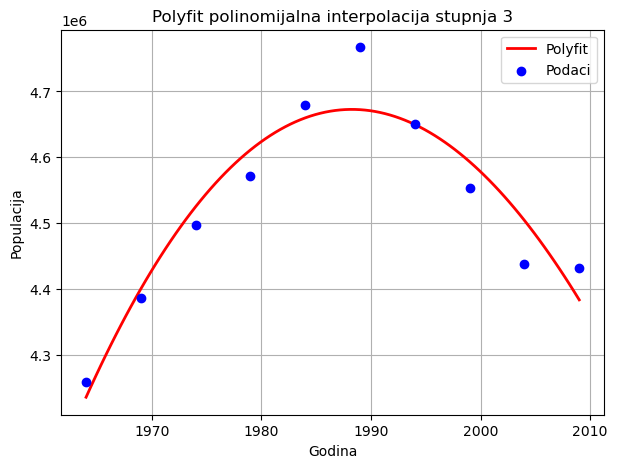

False


In [20]:
degree_3_poly = np.polyfit(x, y, 3)
y_polyfit_population = np.polyval(degree_3_poly, x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_polyfit_population, label="Polyfit", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.title("Polyfit polinomijalna interpolacija stupnja 3")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.legend()
plt.grid()
plt.show()

polyfit3_pass = np.allclose(np.polyval(degree_3_poly, x), y)
print(polyfit3_pass)

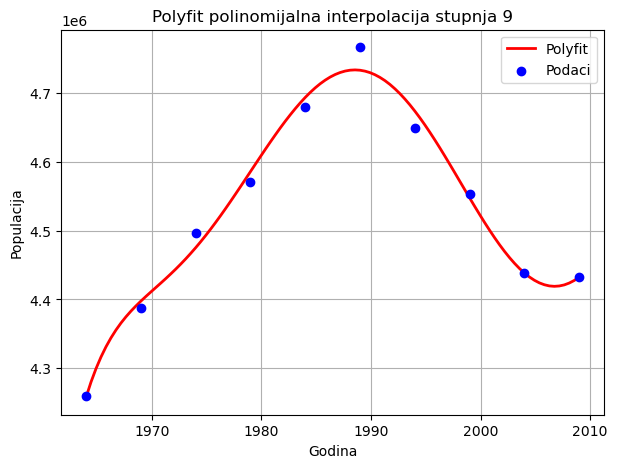

False


In [21]:
degree_9_poly = np.polyfit(x, y, 9)
y_polyfit_population = np.polyval(degree_9_poly, x_eval)

plt.figure(figsize=(7, 5))
plt.plot(x_eval, y_polyfit_population, label="Polyfit", color="red", linewidth=2)
plt.scatter(x, y, label="Podaci", color="blue", zorder=5)
plt.title("Polyfit polinomijalna interpolacija stupnja 9")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.legend()
plt.grid()
plt.show()

polyfit9_pass = np.allclose(np.polyval(degree_9_poly, x), y)
print(polyfit9_pass)

6 .  Sada za podatke iz 4. zadatka iskoristite funkcije s predavanja te interpolirajte dane podatke u 4. zadatku Newtonovim interpolacijskim polinomom. implementacija s predavanja je dana u nastavku. (Za pomoc vidi Jupyter biljeznicu o Newtonovom interpolacijskom polinomu odnosno ovaj [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Newtonov_interpolacijski%20polinom.ipynb) - ako ovaj link ne funkcionira iskoristiti [link3](https://github.com/anazga/Nummat-21_22/blob/main/Newtonov_interpolacijski%20polinom.ipynb))

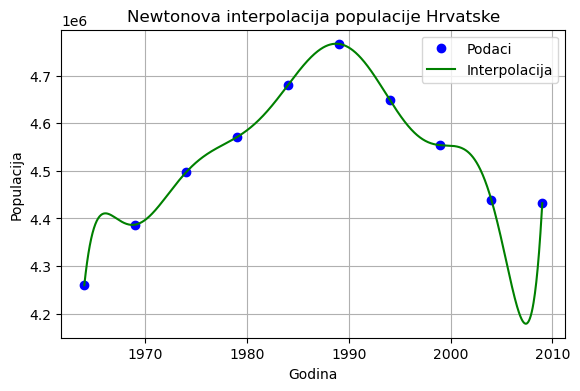

In [22]:
def evalPoly(c,x,xu):
    n = len(x) - 1 
    p = c[n]
    for k in range(1,n+1):
        p = c[n-k] + (xu -x[n-k])*p
    return p

def polycoef(x,y):
    n = len(x) 
    c = y.copy()
    for j in range(1,n):
        c[j:n] = (c[j:n] - c[j-1])/(x[j:n] - x[j-1])
    return c

def NewtonInterp(x,y,xu): 
    c = polycoef(x,y)
    yu = evalPoly(c,x,xu)
    return yu





xp = np.linspace(1964.0, 2009.0, 1000)
yu = NewtonInterp(x, y, xp)

fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, y, 'bo', label="Podaci")  
plt.plot(xp, yu, label="Interpolacija", color="green")  
ax.legend(loc='upper right')
plt.title("Newtonova interpolacija populacije Hrvatske")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.grid()
plt.show()

7 .  Upotrijebite kompozitno trapezno pravilo s predavanja ili ono iz vec implementiranih funkcija u bibliotekama da izračunate vrijednost integrala $\int_0^{\sqrt{\pi}}x^3\cos(7x^2)\, dx$. Broj točaka uzmite po vlastitom izboru. ( za pomoc vidi Jupyter bilježnicu Numerička integracija [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) -ako link ne funkcionira onda vidi [link2](https://github.com/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) )

In [23]:

def f(x):
    return x**3 * np.cos(7*x**2)


def composite_trapezoidal(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  
    y = f(x)  
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1]) 
    return integral


a = 0  
b = np.sqrt(np.pi)
n = 100  


integral_value = composite_trapezoidal(f, a, b, n)
print("Vrijednost integrala: ", integral_value)


Vrijednost integrala:  -0.020658114355804023


8 . Iako na nastavi nismo ove godine radili Rombergov algoritam, probajte ga upotrijebiti da izračunate $\int_0^{\sqrt{\pi}}x^3\cos(7x^2)\, dx$ (za pomoc vidi Jupyter bilježnicu Numerička integracija [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) -ako link ne funkcionira onda vidi [link2](https://github.com/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb))

In [25]:
from scipy.integrate import romberg


def f(x):
    return x**3 * np.cos(7*x**2)


a = 0
b = np.sqrt(np.pi)      


integral_value_romberg = romberg(f, a, b, show=True) 
print("Rezultat: ", integral_value_romberg)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x735b00223ce0> from [0, 1.7724538509055159]

 Steps  StepSize   Results
     1  1.772454 -4.934802 
     2  0.886227 -2.031222 -1.063362 
     4  0.443113  0.012844  0.694199  0.811370 
     8  0.221557 -0.611928 -0.820185 -0.921144 -0.948644 
    16  0.110778 -0.037457  0.154033  0.218981  0.237078  0.241728 
    32  0.055389 -0.023152 -0.018383 -0.029878 -0.033828 -0.034890 -0.035161 
    64  0.027695 -0.021030 -0.020323 -0.020452 -0.020302 -0.020249 -0.020235 -0.020231 
   128  0.013847 -0.020560 -0.020403 -0.020409 -0.020408 -0.020408 -0.020409 -0.020409 -0.020409 
   256  0.006924 -0.020446 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 
   512  0.003462 -0.020418 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 

The final result is -0.020408163265280145 after 513 function evaluations.
Rezultat:  -0.020408163265280145


9 . Prouči funkciju [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), upotrijebite ovu funkciju na matricu $A$ i $y$ po izboru da riješite problem nalaženja linearne regresije, odnosno da riješite preodređeni sustav $Ax\approx y$. (smijete preuzeti i neki primjer koji smo radili na vježbama ili iz ovog labosa, pripazite kakav je sustav (na predavanjima smo imali zapis $y=c_0+c_1x$, dok je na gornjem linku $y=c_0x+c_1$)). Nacrtajte dobiveni pravac.

Matrica A:
[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
m:  1.0199999999999998
c:  0.020000000000000143


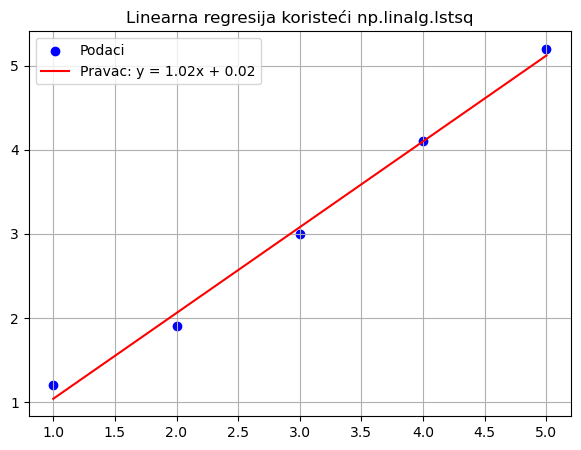

In [26]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.9, 3.0, 4.1, 5.2])


A = np.vstack([x, np.ones(len(x))]).T
print("Matrica A:")
print(A)


m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print("m: ", m)
print("c: ", c)


y_fit = m * x + c


plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Podaci", color="blue")
plt.plot(x, y_fit, label=f"Pravac: y = {m:.2f}x + {c:.2f}", color="red")
plt.title("Linearna regresija koristeći np.linalg.lstsq")
plt.legend()
plt.grid()
plt.show()

10. Odredite QR faktorizaciju matrice $A=\begin{bmatrix} 1& 0\\ 1& 1 \\ 1 & 3\end{bmatrix}$, te potom koristeći dobivenu faktorizaciju riješite problem najmanjih kvadrata $Ax\approx b$, gdje je  $b=\begin{bmatrix} 1\\ 2\\ 3\end{bmatrix}$ (u ovom slučaju tražite linearnu regresiju).


In [27]:
A = np.array([[1,0],
              [1,1],
              [1,3]])
x = np.array([0,1,3])
b = np.array([1,2,3])


Q,R = np.linalg.qr(A)
d = np.dot(Q.T,b)
x = np.dot(np.linalg.inv(R),d)

print(x)


[1.14285714 0.64285714]


10 .  Odredi SVD dekompoziciju matrice $A$ odabrane po vlastitom izboru. (za pomoc vidi [link](https://nbviewer.org/github/anazga/FER3-nummat/blob/main/17.predavanje.ipynb)), potom ispišite singularne vrijednosti koristeći funkciju [link 2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html). Nakon toga ispišite svojstvene vrijednosti matrice $A^TA$ koristeći funkciju [link 3](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html)

In [28]:
from scipy.linalg import svd, eigvals

A = np.array([[1,0],
              [1,1],
              [1,3]])

U, S, Vt = svd(A, full_matrices=False)
eigenvalues = eigvals(np.dot(A.T, A)) 

print("Singularne vrijednosti: ", S)
print("Svojstvene vrijednosti: ", eigenvalues)


Singularne vrijednosti:  [3.43730605 1.08854357]
Svojstvene vrijednosti:  [ 1.18492709+0.j 11.81507291+0.j]
